In [1]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import numpy as np
import itertools 
import datetime
import os
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

import cv2
import os
import io

In [2]:
X_train = []
y_train = []
image_size = 150

In [3]:
train_path = 'E:\machine vision\Brain-Tumor-Classification-master\Brain-Tumor-Classification-master\Dataset\Train'
labels = os.listdir(train_path)
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [4]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [5]:
test_path = 'E:\machine vision\Brain-Tumor-Classification-master\Brain-Tumor-Classification-master\Dataset\Test'

In [6]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [7]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [8]:
y_train[1]

'glioma'

In [9]:
len(X_train), len(y_train)

(7023, 7023)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
X_train.shape, y_train.shape

((7023, 150, 150, 3), (7023,))

In [12]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [13]:
y_train[1]

'glioma'

In [14]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((7023, 150, 150, 3), (7023,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [16]:
y_train[:5]

array(['meningioma', 'pituitary', 'glioma', 'notumor', 'glioma'],
      dtype='<U10')

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 3, 0, 2, 0]

In [18]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [19]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [20]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (image_size, image_size, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4, activation = 'softmax'))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [23]:
hist = model.fit(X_train, y_train_new, epochs = 20, validation_split = 0.1) 

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.3091 - loss: 2.3908 - val_accuracy: 0.6614 - val_loss: 0.8187
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.6823 - loss: 0.7730 - val_accuracy: 0.7104 - val_loss: 0.6242
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.7553 - loss: 0.6103 - val_accuracy: 0.7500 - val_loss: 0.5260
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 176s 986ms/step - accuracy: 0.8105 - loss: 0.4547 - val_accuracy: 0.7722 - val_loss: 0.5264
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8252 - loss: 0.4064 - val_accuracy: 0.8655 - val_loss: 0.3567
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8654 - loss: 0.3329 - val_accuracy: 0.7484 - val_loss: 0.5479
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8794 - loss: 0.3130 - val_accuracy: 0.8877 - val_loss: 0.3183
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9226 - loss: 0.2162 - val_a

In [24]:
model.save("Brain_Tumor_Image_Classification_Model.h5")

In [25]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

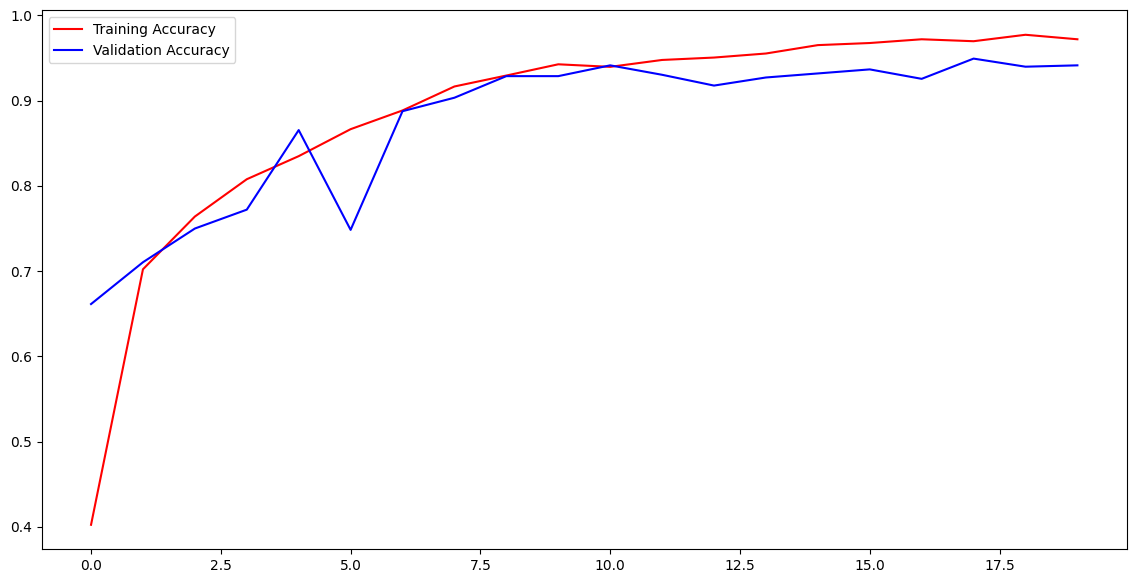

In [27]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

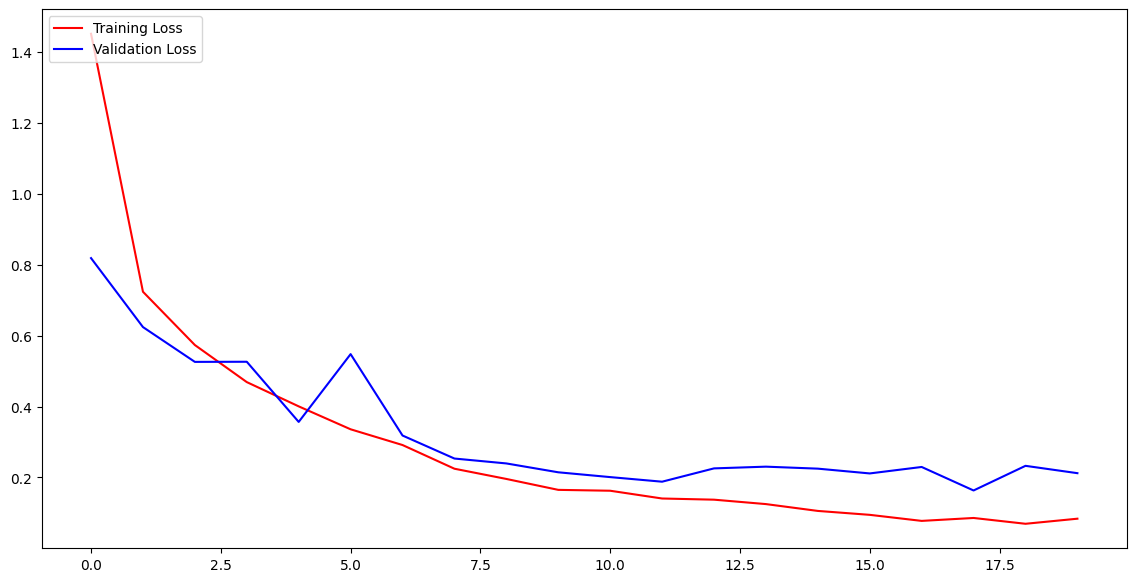

In [28]:
loss = hist.history['loss']
val_loss = hist.history['val_loss'] 

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'upper left')
plt.show()

In [31]:
img_path = r'E:\machine vision\Brain-Tumor-Classification-master\Brain-Tumor-Classification-master\Dataset\Test\notumor\Test-notumor-2.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [32]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [33]:
from tensorflow.keras.preprocessing import image

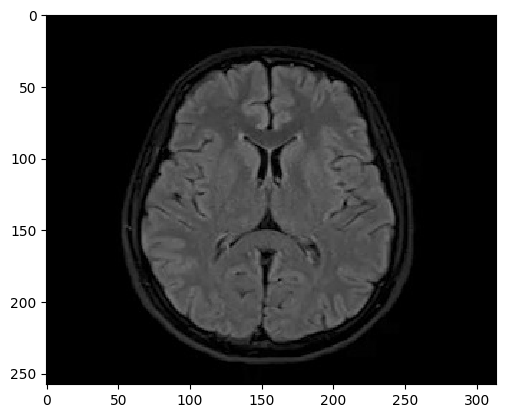

In [34]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

In [35]:
a = model.predict(img_array)
print(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
[[4.9086931e-14 1.6423134e-10 1.0000000e+00 6.9426971e-16]]


In [36]:
indices = a.argmax()
indices

2

In [37]:
labels[indices]

'notumor'